# FINAL CLUSTERING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import qgrid

pd.options.display.float_format = '{:.1f}'.format #So the numbers will not appear in a scientific format

#!pip install --upgrade streamlit opencv-python  STREAMLIT LIBRARY 
#!pip install qgrid
#!pip install ipywidgets
#!jupyter nbextension enable --py --sys-prefix qgrid
#!jupyter nbextension enable --py --sys-prefix widgetsnbextension



In [3]:
def visualization_clusters(data, clustering_model):

    # calinski_harabasz and silhouette scores visualization
    visualizer1 = KElbowVisualizer(
        clustering_model, k=(3,17), metric='calinski_harabasz', timings=False
    )

    visualizer1.fit(data)        # Fit the data to the visualizer
    visualizer1.show()        # Finalize and render the figure

    visualizer2 = KElbowVisualizer(
        clustering_model, k=(3,17), metric='silhouette', timings=False
    )

    visualizer2.fit(data)        # Fit the data to the visualizer
    visualizer2.show()        # Finalize and render the figure
    
    visualizer3 = KElbowVisualizer(
    clustering_model, k=(3,17), metric='distortion', timings=False
    )

    visualizer3.fit(data)        # Fit the data to the visualizer
    visualizer3.show()        # Finalize and render the figure

- I have to modify the results_evaluation function so it works with the shape of each cluster:

In [4]:

def results_evaluation_subclusters(model, data, cluster_number):

    #This function has 2 arguments:
    #-model: to define de Clusters and the scores
    #-data: the data I´m working with, to calculate the scores
  

    print('CLUSTERING DIVISION:\n', pd.DataFrame(model.labels_)[0].value_counts())
    
    new_df = subclustering[subclustering['Cluster']==cluster_number].copy()
    new_df['Cluster'] = model.labels_
    display(new_df.groupby('Cluster').mean())
    
    print('The Silhouette Score is: ', silhouette_score(data, model.labels_, metric='euclidean'))
    print('The Calinski Harabasz Score is: ', calinski_harabasz_score(data, model.labels_))
    print('The Davies Douldin Score is: ', davies_bouldin_score(data, model.labels_))


## SUBCLUSTERING

- I´m gonna apply a new clustering over data to define subclusters and make a better grouping

- For this new clustering I am going to use 3 variables: FORMAT LOADS, IMPRESSIONS AND CLICKS. These are the 3 more important variables that I didn´t use in the first clustering. I chose not to use them because the scale is extremely higher that the scale of the percentage variables, although I also tried with Standar and Robust Scalers, so I hope these variables will give me some interesting clusters, after this first general division. 

In [8]:
clusters = pd.read_csv('DATA/Main Clusters before subclustering.csv')
groupby_domains = pd.read_csv('DATA/Global groupby_domains.csv')


subclustering = groupby_domains[['Format Loads', 'Impressions', 'Clicks']].copy()
subclustering['Cluster'] = clusters['Cluster']

<AxesSubplot:>

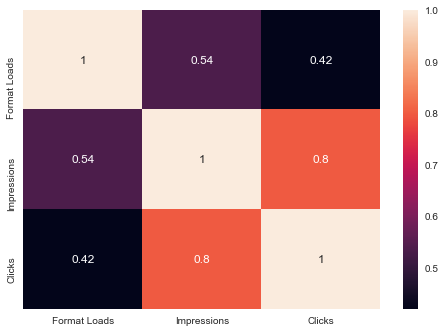

In [9]:
sns.heatmap(subclustering.drop('Cluster', 1).corr(), annot=True)

**PCA is a way to deal with highly correlated variables, so there is no need to remove them**


Text(0, 0.5, 'Cumulative explained variance')

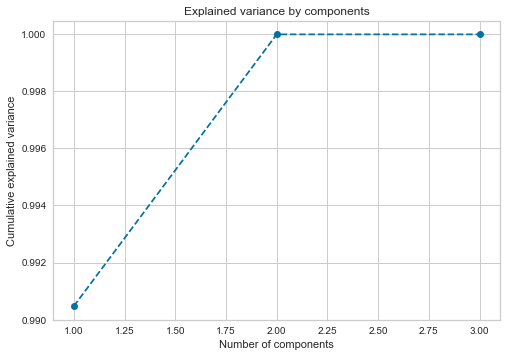

In [10]:
pca = PCA()
pca.fit(subclustering.drop('Cluster', 1))
plt.plot(range(1,4), pca.explained_variance_ratio_.cumsum(), marker= 'o' , linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [11]:
pca=PCA(n_components=1)
new_clustering_pca = pd.DataFrame(pca.fit_transform(subclustering.drop('Cluster', 1)))
new_clustering_pca['Cluster'] = clusters['Cluster']

In [14]:
groupby_domains.head(5)

,Domain,Format Loads,Impressions,Format Fill Rate,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,50% View Rate,Category,Category importance,Country,Geographical zone
0,memurlar.net,2739246.9,8942.4,0.6,83.8,92.7,1.6,46.8,0.5,67.9,Health & Wellness,2.1,Turkey,West Europe
1,missyusa.com,1732798.1,124798.8,10.8,78.1,98.5,1.7,98.4,0.1,62.1,News & Portals,58.6,United States,North America
2,bitbol.la,1054934.0,34032.1,3.8,86.5,89.5,1.4,145.3,0.4,68.1,Sports,7.6,Peru,South America
3,youm7.com,992088.0,11080.8,1.1,61.3,91.5,1.7,48.5,0.4,67.5,News & Portals,58.6,Egypt,Africa
4,chinatimes.com,990576.1,188611.0,19.5,90.0,99.1,1.8,1312.0,0.8,71.9,News & Portals,58.6,Taiwan,Asia


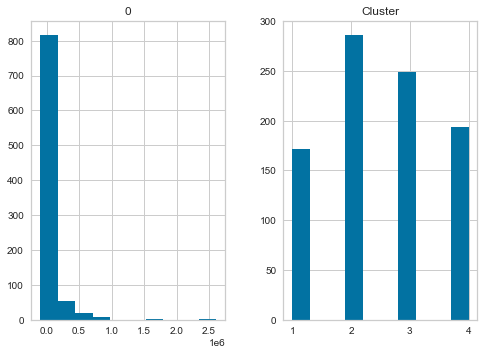

In [12]:
new_clustering_pca.hist();

- **NOTE : I did the subclustering proccess applying MinMax Scaler and Robust Scaler, but the results and the quality of the cluster were practically identical to the subclustering without preprocessing**

### SUBCLUSTERING: CLUSTER 1

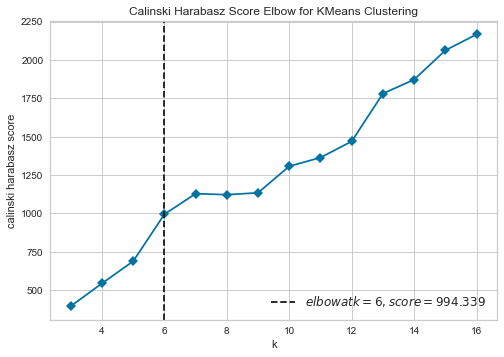

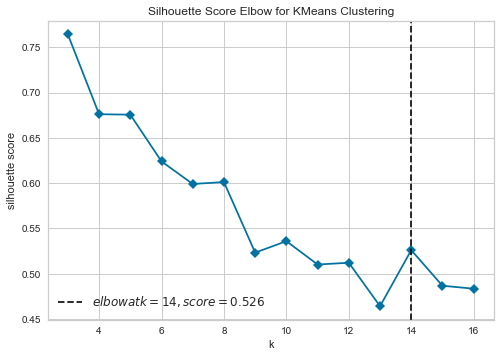

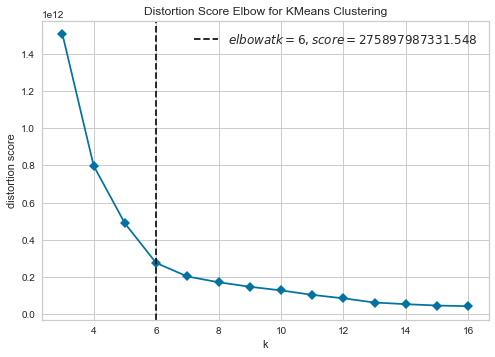

In [34]:
cluster1= new_clustering_pca[new_clustering_pca['Cluster']==1].copy()
cluster1.drop('Cluster', 1, inplace=True)
model = KMeans(init='k-means++', max_iter=1000, n_init=5, algorithm='auto')
visualization_clusters(cluster1, model)

CLUSTERING DIVISION:
 2    96
0    47
5    16
3     8
1     4
4     1
Name: 0, dtype: int64


,Format Loads,Impressions,Clicks
Cluster,,,
0,136565.33,8579.45,53.27
1,935071.69,77104.86,459.86
2,43021.57,5381.13,24.72
3,609388.52,28897.54,287.69
4,1732798.15,124798.83,98.44
5,318721.88,28079.09,196.72


The Silhouette Score is:  0.6231921017970445
The Calinski Harabasz Score is:  990.6614268740534
The Davies Douldin Score is:  0.43118744558526384


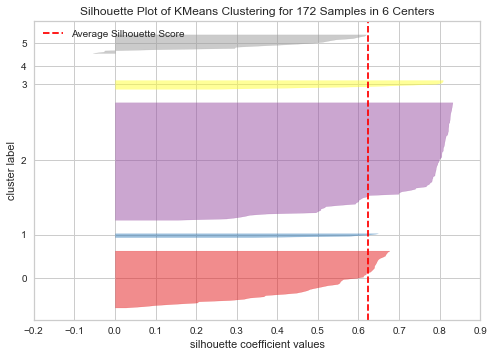

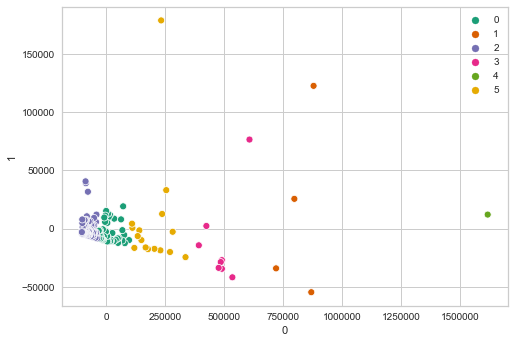

In [36]:
kmeans_cluster1 = KMeans(n_clusters=6, init='k-means++', max_iter=1000, n_init=5, algorithm='auto')
kmeans_cluster1.fit(cluster1)
results_evaluation_subclusters(kmeans_cluster1, cluster1, 1)

sv = SilhouetteVisualizer(kmeans_cluster1)
sv.fit(cluster1)
sv.show()

sns.scatterplot(cluster1[0], cluster1[1], hue=kmeans_cluster1.labels_,palette='Dark2')

In [77]:
groupby_domains[groupby_domains['Format Loads']==1732798.15]

,Domain,Format Loads,Impressions,Format Fill Rate,Viewability Rate,Efficiency Rate,CPM,Clicks,CTR,50% View Rate,Category,Category importance,Country,Geographical zone


In [79]:
pd.options.display.max_columns=None

subclusters1 = subclustering[subclustering['Cluster']==1].copy()
subclusters1['Subcluster'] = kmeans_cluster1.labels_
subclusters1 = subclusters1.merge(groupby_domains[['Format Fill Rate']], left_index=True, right_index=True)
sub1_1, sub1_2 , sub1_3, sub1_4, sub1_5, sub1_6 = [x for _, x in subclusters1.groupby('Subcluster')]
subclusters1.drop('Cluster', 1).groupby('Subcluster').describe()


Format Loads                                                       \
                  count       mean      std        min        25%        50%   
Subcluster                                                                     
0                 47.00  136565.33 34442.68   91104.32  109248.46  127656.67   
1                  4.00  935071.69 71554.75  842081.28  897176.37  953058.77   
2                 96.00   43021.57 18067.62   20050.66   27570.47   39440.98   
3                  8.00  609388.52 63729.37  514596.89  586064.76  610559.52   
4                  1.00 1732798.15      nan 1732798.15 1732798.15 1732798.15   
5                 16.00  318721.88 68340.00  231418.08  261071.77  313756.60   

                                 Impressions                               \
                  75%        max       count      mean      std       min   
Subcluster                                                                  
0           159745.68  219605.01       47.00   8579.45  8659.35     23.03   
1           990954.09  992087.95        4.00  77104.86 81456.99  11080.76   
2            53209.17   85713.18       96.00   5381.13  8041.80      4.00   
3           624564.23  722822.39        8.00  28897.54 40679.35   2777.19   
4          1732798.15 1732798.15        1.00 124798.83      nan 124798.83   
5           362058.41  459106.43       16.00  28079.09 49244.43   1771.51   

                                                   Clicks                      \
                 25%       50%       75%       max  count   mean    std   min   
Subcluster                                                                      
0            1924.34   5468.09  12002.23  34416.34  47.00  53.27  72.22  0.06   
1           19364.34  54363.83 112104.34 188611.01   4.00 459.86 580.09 48.46   
2            1183.74   2402.37   6053.47  45797.86  96.00  24.72  39.04  0.00   
3            7261.12  13697.82  25889.88 125441.87   8.00 287.69 566.03  4.36   
4          124798.83 124798.83 124798.83 124798.83   1.00  98.44    nan 98.44   
5            6564.59  11590.38  22896.20 203967.16  16.00 196.72 351.05 18.54   

                                        Format Fill Rate                    \
              25%    50%    75%     max            count  mean   std   min   
Subcluster                                                                   
0            9.92  27.09  66.30  311.40            47.00  7.39  7.79  0.02   
1          122.56 239.49 576.79 1311.98             4.00 10.00  8.64  1.14   
2            4.38  12.12  24.89  221.24            96.00 11.59 15.38  0.01   
3           39.20  69.70 162.22 1667.39             8.00  6.21  7.63  0.43   
4           98.44  98.44  98.44   98.44             1.00 10.81   nan 10.81   
5           59.56  89.35 148.03 1460.67            16.00 12.30 16.10  0.29   

                                     
             25%   50%   75%    max  
Subcluster                           
0           1.57  4.54 12.37  32.53  
1           3.64  9.67 16.03  19.54  
2           2.82  6.77 15.45 112.28  
3           1.93  3.03  6.39  21.77  
4          10.81 10.81 10.81  10.81  
5           1.90  7.75 13.67  63.20

- **Cluster 1 subcluster 1**: 47 Domains. Format load range(136.000-219.000). Clicks and impressions are widespread, low mean of Format Fill Rate(7%)
- **Cluster 1 subcluster 2**: 4 outliers with Format loads range 840-992.000, and high rates of Impressions and means. Format Fill Rate mean is 10%
- **Cluster 1 subcluster 3**:Main subcluster with 96 domains and the lowest Format Loads of the cluster, between 20.000 and 85.000. The means of Impressions and clicks are also very poor, 5300 and and 24
- **Cluster 1 subcluster 4**: 6  domains with Format loads range 514-722.000, the mean of clicks is the highest of the cluster, but with the lowest Format Fill Rate mean of the cluster, 6%
- **Cluster 1 subcluster 5**:The main Domain of the dataset()1.700.000 Format Loads, 10,81% Format Fill Rate
- **Cluster 1 subcluster 6**: 16 Domains. Format Loads between 230.000 and 460.000. Best format fill rate of the cluster



### SUBCLUSTERING: CLUSTER 2

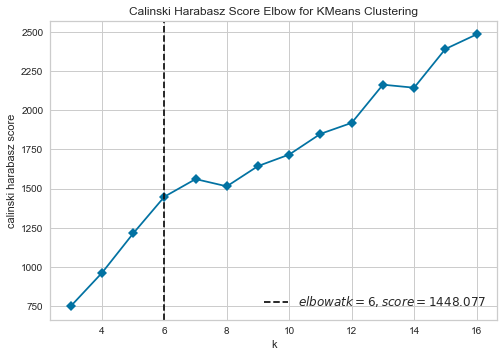

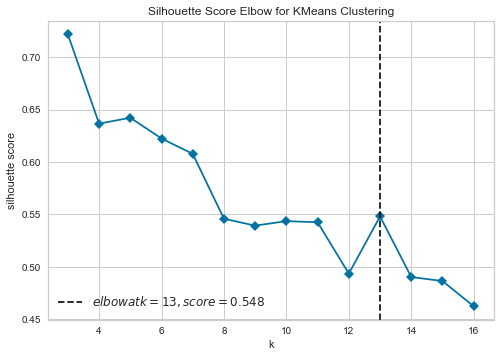

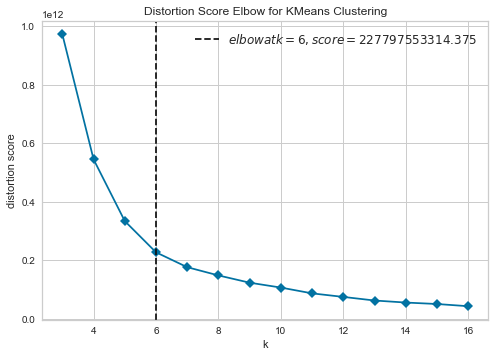

In [94]:
cluster2= new_clustering_pca[new_clustering_pca['Cluster']==2].copy()
cluster2.drop('Cluster', 1, inplace=True)
model = KMeans(init='k-means++', max_iter=1000, n_init=5, algorithm='auto')
visualization_clusters(cluster2, model)

CLUSTERING DIVISION:
 0    155
4     75
2     27
5     18
3      8
1      3
Name: 0, dtype: int64


,Format Loads,Impressions,Clicks
Cluster,,,
0,41168.18,3983.71,28.55
1,874187.94,174513.93,1526.83
2,212408.96,20670.11,142.01
3,585542.36,46270.17,339.59
4,112699.32,11617.50,83.86
5,372570.65,26566.00,168.36


The Silhouette Score is:  0.6223599679584927
The Calinski Harabasz Score is:  1448.0771573236884
The Davies Douldin Score is:  0.5101775259579894


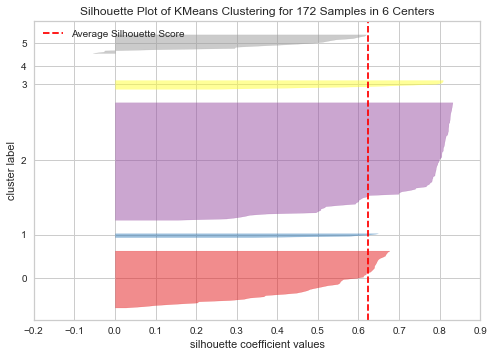

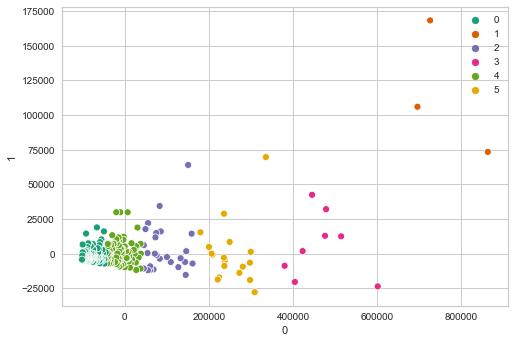

In [97]:
kmeans_cluster2 = KMeans(n_clusters=6, init='k-means++', max_iter=1000, n_init=5, algorithm='auto')
kmeans_cluster2.fit(cluster2)
results_evaluation_subclusters(kmeans_cluster2, cluster2, 2)

sv = SilhouetteVisualizer(kmeans_cluster1)
sv.fit(cluster1).show()

sns.scatterplot(cluster2[0], cluster2[1], hue=kmeans_cluster2.labels_,palette='Dark2')

In [98]:
subclusters2 = subclustering[subclustering['Cluster']==2].copy()
subclusters2['Subcluster'] = kmeans_cluster2.labels_
subclusters2= subclusters2.merge(groupby_domains[['Format Fill Rate']], left_index=True, right_index=True)
sub2_1, sub2_2 , sub2_3, sub2_4, sub2_5, sub2_6 = [x for _, x in subclusters2.groupby('Subcluster')]
subclusters2.drop('Cluster', 1).groupby('Subcluster').describe()

Format Loads                                                   \
                  count      mean      std       min       25%       50%   
Subcluster                                                                 
0                155.00  41168.18 14602.02  20347.50  29514.01  37654.29   
1                  3.00 874187.94 90942.97 809165.13 822226.33 835287.53   
2                 27.00 212408.96 39320.13 166460.28 179783.53 197119.80   
3                  8.00 585542.36 70111.60 501339.68 539080.61 579542.59   
4                 75.00 112699.32 22802.28  80292.91  94375.03 108772.58   
5                 18.00 372570.65 43439.73 300034.86 344041.46 358654.61   

                               Impressions                               \
                 75%       max       count      mean      std       min   
Subcluster                                                                
0           51408.42  76260.06      155.00   3983.71  4263.37      7.75   
1          906699.35 978111.17        3.00 174513.93 44692.55 138521.25   
2          251778.99 282756.57       27.00  20670.11 17712.41   2317.92   
3          606292.20 723142.71        8.00  46270.17 23627.06  15914.22   
4          128395.81 159665.67       75.00  11617.50  8857.38    692.02   
5          414701.29 451921.26       18.00  26566.00 22481.29   2500.71   

                                                   Clicks                  \
                 25%       50%       75%       max  count    mean     std   
Subcluster                                                                  
0            1234.62   2807.29   5048.90  25461.85 155.00   28.55   38.72   
1          149501.55 160481.85 192510.27 224538.68   3.00 1526.83 1516.21   
2           10359.92  14671.45  30955.64  84119.29  27.00  142.01   90.53   
3           25820.41  46524.42  60044.40  81244.98   8.00  339.59  257.66   
4            4762.97  10677.64  15978.09  40990.08  75.00   83.86   72.92   
5           14834.27  22934.60  30296.68 101494.78  18.00  168.36  105.42   

                                                Format Fill Rate              \
              min    25%    50%     75%     max            count  mean   std   
Subcluster                                                                     
0            0.05   6.53  19.81   31.42  382.21           155.00  9.75  9.70   
1          562.39 653.01 743.64 2009.06 3274.48             3.00 19.26 10.40   
2           13.85  76.51 125.71  193.63  351.63            27.00 11.27  8.80   
3          105.93 147.99 300.66  402.39  895.53             8.00 13.25 12.43   
4            2.12  24.96  66.34  123.94  281.60            75.00 11.72  8.54   
5           13.80  74.87 166.48  214.97  419.40            18.00  9.43  8.39   

                                         
            min   25%   50%   75%   max  
Subcluster                               
0          0.02  2.99  7.34 12.39 53.97  
1          7.46 15.34 23.23 25.16 27.08  
2          1.63  5.39  8.18 17.65 37.28  
3          3.13  5.18  8.88 15.43 39.40  
4          0.45  5.04 11.11 16.60 39.70  
5          0.60  3.79  6.74 11.37 30.18

- **Cluster 2 subcluster 1**: Main subcluster with 155 domains and the lowest Format Loads of the cluster, between 20.000 and 76.000. Format fill rate around 10%

- **Cluster 2 subcluster 2**: 3 outliers with Format loads range 809-978.000, and the highest rates of Impressions, clicks and Format Fill Rate. 
- **Cluster 2 subcluster 3**: 27 Domains with FL between 166.000 and 282.000 (medium range). High means of Impressions, clicks and Format Fill Rate.
- **Cluster 2 subcluster 4**: 8  domains with Format loads range 500-723.000. Strong Format Fill Rate (13%) and high mean of clicks(339)
- **Cluster 2 subcluster 5**:75  domains with Format loads range 80-160.000. Good Format Fill rate (11.72%)
- **Cluster 2 subcluster 6**: 18 Domains. Format Loads between 300.000 and 450.000. It has a decent Format Fill Rate (9.50%)

### SUBCLUSTERING: CLUSTER 3

C:\Users\Usuario\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


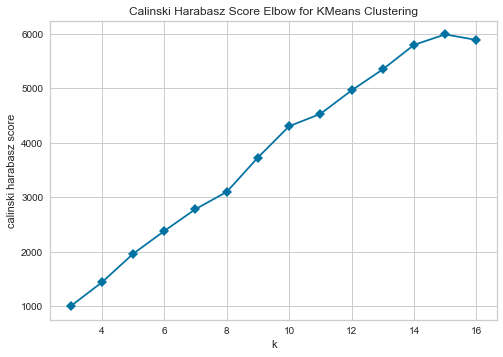

C:\Users\Usuario\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


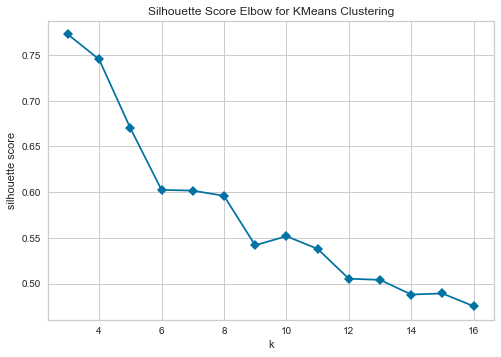

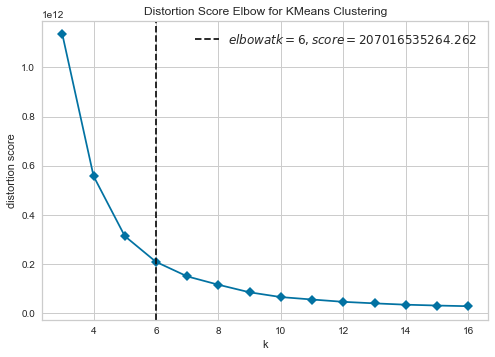

In [53]:
cluster3= new_clustering_pca[new_clustering_pca['Cluster']==3].copy()
cluster3.drop('Cluster', 1, inplace=True)
model = KMeans(init='k-means++', max_iter=1000, n_init=10, algorithm='auto')
visualization_clusters(cluster3, model)

CLUSTERING DIVISION:
 4    145
0     59
5     24
2     17
3      3
1      1
Name: 0, dtype: int64


,Format Loads,Impressions,Clicks
Cluster,,,
0,97010.86,5711.92,23.42
1,2739246.93,8942.44,46.82
2,354612.65,12400.71,59.20
3,741600.83,37467.05,243.96
4,37191.89,3617.96,16.32
5,205182.25,18604.18,64.30


The Silhouette Score is:  0.6024475960930301
The Calinski Harabasz Score is:  2378.311104613217
The Davies Douldin Score is:  0.44931907163810547


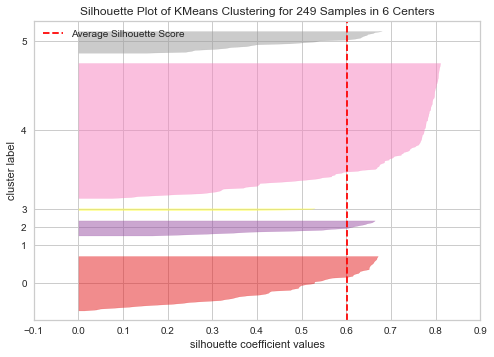

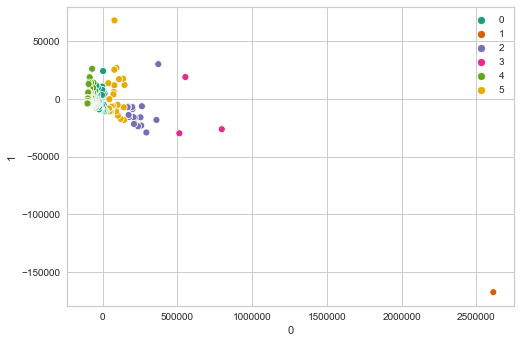

In [59]:
kmeans_cluster3 = KMeans(n_clusters=6, init='k-means++', max_iter=1000, n_init=5, algorithm='auto')
kmeans_cluster3.fit(cluster3)
results_evaluation_subclusters(kmeans_cluster3, cluster3, 3)

sv = SilhouetteVisualizer(kmeans_cluster3)
sv.fit(cluster3).show()

sns.scatterplot(cluster3[0], cluster3[1], hue=kmeans_cluster3.labels_,palette='Dark2')

In [111]:
subclusters3 = subclustering[subclustering['Cluster']==3].copy()
subclusters3['Subcluster'] = kmeans_cluster3.labels_
subclusters3= subclusters3.merge(groupby_domains[['Format Fill Rate']], left_index=True, right_index=True)

sub3_1, sub3_2 , sub3_3, sub3_4, sub3_5, sub3_6= [x for _, x in subclusters3.groupby('Subcluster')]

subclusters3.drop('Cluster', 1).groupby('Subcluster').describe()

Format Loads                                                        \
                  count       mean       std        min        25%        50%   
Subcluster                                                                      
0                 59.00   97010.86  22398.09   67714.15   77202.73   95723.48   
1                  1.00 2739246.93       nan 2739246.93 2739246.93 2739246.93   
2                 17.00  354612.65  60848.29  288315.02  318776.83  334065.42   
3                  3.00  741600.83 153709.11  634961.60  653504.99  672048.38   
4                145.00   37191.89  13166.56   20168.33   25393.67   34708.44   
5                 24.00  205182.25  34025.46  157940.64  178544.99  196562.88   

                                 Impressions                             \
                  75%        max       count     mean      std      min   
Subcluster                                                                
0           115807.68  146129.77       59.00  5711.92  6759.28     1.00   
1          2739246.93 2739246.93        1.00  8942.44      nan  8942.44   
2           379777.77  490576.38       17.00 12400.71 14578.81    64.00   
3           794920.45  917792.52        3.00 37467.05 25631.32 13314.47   
4            47620.14   65981.85      145.00  3617.96  5153.83     0.00   
5           224836.30  266097.24       24.00 18604.18 19387.82  1018.22   

                                               Clicks                       \
                25%      50%      75%      max  count   mean    std    min   
Subcluster                                                                   
0           1048.28  3615.24  7766.24 34750.95  59.00  23.42  36.41   0.00   
1           8942.44  8942.44  8942.44  8942.44   1.00  46.82    nan  46.82   
2           3858.92  8030.08 14771.77 64051.55  17.00  59.20  79.05   0.00   
3          24021.91 34729.35 49543.34 64357.32   3.00 243.96 107.32 141.24   
4            538.86  1886.39  4391.34 32114.88 145.00  16.32  30.61   0.00   
5           4288.76 11956.79 28381.01 83235.65  24.00  64.30  79.97   0.11   

                                       Format Fill Rate                       \
              25%    50%    75%    max            count mean   std  min  25%   
Subcluster                                                                     
0            2.33  10.24  21.65 196.79            59.00 6.85  7.39 0.00 1.62   
1           46.82  46.82  46.82  46.82             1.00 0.60   nan 0.60 0.60   
2            6.85  25.79  59.69 309.34            17.00 5.09  5.04 0.03 0.89   
3          188.27 235.30 295.32 355.35             3.00 9.73  7.48 2.23 6.00   
4            1.45   6.54  16.36 205.07           145.00 8.81 12.21 0.00 1.83   
5            8.58  27.89  90.81 310.94            24.00 8.81 10.35 0.23 2.30   

                             
            50%   75%   max  
Subcluster                   
0          3.77  9.60 29.33  
1          0.60  0.60  0.60  
2          3.80  6.68 16.86  
3          9.76 13.48 17.19  
4          4.71 10.45 85.34  
5          4.56 11.38 41.36

In [118]:
sub3_6.describe()

,Format Loads,Impressions,Clicks,Cluster,Subcluster,Format Fill Rate
count,24.00,24.00,24.00,24.00,24.00,24.00
mean,205182.25,18604.18,64.30,3.00,5.00,8.81
std,34025.46,19387.82,79.97,0.00,0.00,10.35
min,157940.64,1018.22,0.11,3.00,5.00,0.23
25%,178544.99,4288.76,8.58,3.00,5.00,2.30
50%,196562.88,11956.79,27.89,3.00,5.00,4.56
75%,224836.30,28381.01,90.81,3.00,5.00,11.38
max,266097.24,83235.65,310.94,3.00,5.00,41.36


- **Cluster 3 subcluster 1**: 59 Domains. Format Loads range: 67-146.000. Poor FL rate (6%) 
- **Cluster 3 subcluster 2**: 1 outlier, the one with the highest traffic of the dataset (2.700.000) but the worst Format Fill Rate of the cluster (0,6%)
- **Cluster 3 subcluster 3**: 17 Domains with FL between 288.000 and 290.000. Poor Format Fill Rate (5%)
- **Cluster 3 subcluster 4**: 3 outliers (FL between 634-917.000), the best Clicks mean  and the best Format Fill Rate of the cluster (9.73)
- **Cluster 3 subcluster 5**:Main subcluster with 145 domains and the lowest Format Loads of the cluster, between 20.000 and 65.000. Format fill rate around 9%
- **Cluster 3 subcluster 6**: 24 Domains. Format Loads between 157.000 and 266.000(medium range). It has a decent Format Fill Rate (8.80%)

### SUBCLUSTERING: CLUSTER 4

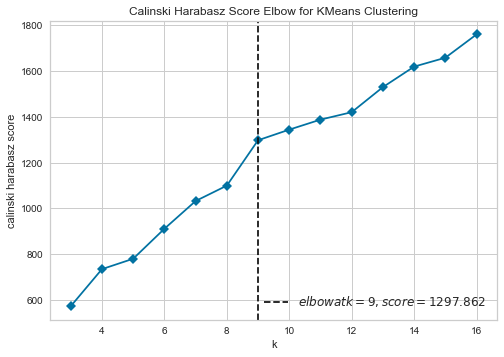

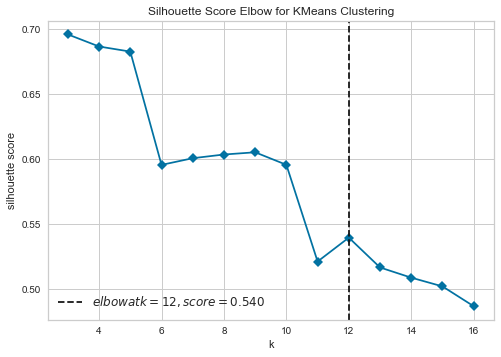

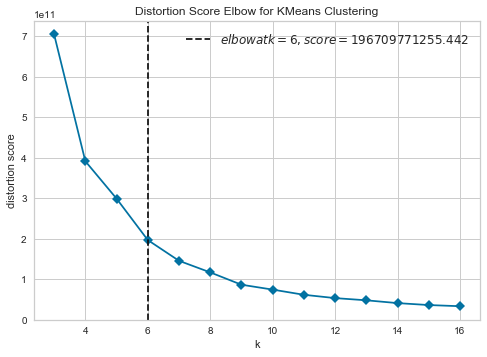

In [62]:
cluster4= new_clustering_pca[new_clustering_pca['Cluster']==4].copy()
cluster4.drop('Cluster', 1, inplace=True)
model = KMeans(init='k-means++', max_iter=1000, n_init=5, algorithm='auto')
visualization_clusters(cluster4, model)

CLUSTERING DIVISION:
 2    124
0     43
5     14
3      6
1      5
4      2
Name: 0, dtype: int64


,Format Loads,Impressions,Clicks
Cluster,,,
0,126790.35,16718.46,112.87
1,688569.34,36790.95,274.29
2,41446.73,4643.43,28.76
3,416456.25,98519.44,326.18
4,1012234.66,56718.60,77.47
5,231794.60,30048.29,181.75


The Silhouette Score is:  0.6288546004256897
The Calinski Harabasz Score is:  910.6040142139921
The Davies Douldin Score is:  0.5740662390488936


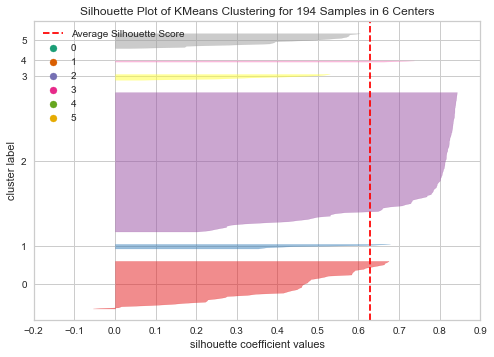

In [63]:
kmeans_cluster4 = KMeans(n_clusters=6, init='k-means++', max_iter=1000, n_init=15, algorithm='auto')
kmeans_cluster4.fit(cluster4)
results_evaluation_subclusters(kmeans_cluster4, cluster4, 4)

sns.scatterplot(cluster4[0], cluster4[1], hue=kmeans_cluster4.labels_,palette='Dark2')

sv = SilhouetteVisualizer(kmeans_cluster4)
sv.fit(cluster4).show()

In [119]:
subclusters4 = subclustering[subclustering['Cluster']==4].copy()
subclusters4['Subcluster'] = kmeans_cluster4.labels_
subclusters4= subclusters4.merge(groupby_domains[['Format Fill Rate']], left_index=True, right_index=True)


sub4_1, sub4_2, sub4_3, sub4_4, sub4_5, sub4_6 = [x for _, x in subclusters4.groupby('Subcluster')]

subclusters4.drop('Cluster', 1).groupby('Subcluster').describe()

Format Loads                                                     \
                  count       mean      std       min       25%        50%   
Subcluster                                                                   
0                 43.00  126790.35 30070.84  82831.33 104340.96  117210.70   
1                  5.00  688569.34 88483.49 589709.78 606538.19  708477.17   
2                124.00   41446.73 17019.99  20381.44  27356.07   38247.68   
3                  6.00  416456.25 57915.82 351715.60 376832.63  409690.15   
4                  2.00 1012234.66 60386.05 969535.28 990884.97 1012234.66   
5                 14.00  231794.60 38231.13 181367.84 209156.22  221371.69   

                                 Impressions                             \
                  75%        max       count     mean      std      min   
Subcluster                                                                
0           152834.94  175915.86       43.00 16718.46 11903.94     3.62   
1           742033.66  796087.89        5.00 36790.95 24913.53     9.67   
2            49740.84   80313.83      124.00  4643.43  4032.32    18.17   
3           439530.11  512284.71        6.00 98519.44 70448.78 34174.99   
4          1033584.35 1054934.05        2.00 56718.60 32083.56 34032.09   
5           253211.44  314675.34       14.00 30048.29 33632.46  1704.50   

                                                 Clicks                       \
                25%      50%       75%       max  count   mean    std    min   
Subcluster                                                                     
0           8373.66 13379.63  23051.88  46663.43  43.00 112.87 103.27   0.00   
1          22824.27 47020.27  54895.56  59205.00   5.00 274.29 260.11   0.00   
2           1553.31  3491.73   6691.62  17925.28 124.00  28.76  33.17   0.00   
3          35991.82 86395.40 157852.49 183288.71   6.00 326.18 172.74 165.47   
4          45375.34 56718.60  68061.85  79405.10   2.00  77.47  95.89   9.66   
5           7230.50 22399.05  38069.89 126908.93  14.00 181.75 177.98   0.32   

                                       Format Fill Rate                        \
              25%    50%    75%    max            count  mean   std  min  25%   
Subcluster                                                                      
0           52.15  84.21 135.13 532.84            43.00 14.86 10.38 0.01 6.79   
1          145.13 201.92 338.60 685.81             5.00  5.18  4.11 0.00 1.93   
2            6.94  19.40  40.65 247.66           124.00 10.82  8.70 0.17 4.05   
3          216.47 268.02 385.89 631.08             6.00 24.45 17.25 8.69 9.20   
4           43.57  77.47 111.37 145.27             2.00  8.52  6.73 3.77 6.14   
5           74.80 117.30 232.19 657.39            14.00 16.12 18.00 1.04 3.65   

                              
             50%   75%   max  
Subcluster                    
0          12.07 22.02 43.09  
1           5.91  9.02  9.04  
2           8.89 17.34 51.78  
3          22.35 35.98 47.94  
4           8.52 10.90 13.28  
5          10.64 19.23 67.94

- **Cluster 4 subcluster 1**: 43 Domains. Format Loads range: 82-175.000. Good FL rate (14%) 
- **Cluster 4 subcluster 2**: 5 outliers, between 600-800.000 FL, and lowest FL rate (5%)
- **Cluster 4 subcluster 3**: Main subcluster with 124 domains and the lowest Format Loads of the cluster, between 20.000 and 80.000. Format fill rate around 8%
- **Cluster 4 subcluster 4**: 6 Domains (FL between 350-510.000), the best Clicks mean  and the best Format Fill Rate of the cluster by far(25%)
- **Cluster 4 subcluster 5**:2 outliers (969-105.000.000) with a medium Format Fill rate (around 10%)
- **Cluster 4 subcluster 6**: 14 Domains. Format Loads between 181.000 and 314.000(medium range). It has a rellay good Format Fill Rate mean (26%)


        

### ***Some observations about the subclustering proccess***

- In the four clusters we have a big subcluster which contains the  domains the worst quality of the cluster (low Format Loads, Impressions and Clicks).

- We can observe that the most decisive variable is Format Loads. The algorithm divide the clusters by Format Loads ranges, and Impressions and Clicks come into play when the Format Loads ranges are similar. Theorically, this could be a disadvantage because Format Loads have too much weight. But in this case, looking from a business point of view, it´s just what I need because that is the most important variable by far.

- In the four clusters, the number of subclusters with better results, attending to the internal validation, was 4. However, I tried with 4 and 6 suclusters, and I finally decided to choose 6 and sacrified the best tecnhical results for one reason: I observed, because of the proximity of points, that when I reduced the subclusters, the domains are recolocated in the main subcluster, which is the one that I clearly want to separate from the rest, because it contains the bad quality domains, and this helps to make a better division.

In [65]:
concat_subclusters = pd.concat([sub1_1, sub1_2 , sub1_3, sub1_4, sub1_5, sub1_6,
    sub2_1, sub2_2 , sub2_3, sub2_4, sub2_5, sub2_6,
    sub3_1, sub3_2 , sub3_3, sub3_4, sub3_5, sub3_6,
    sub4_1, sub4_2, sub4_3, sub4_4, sub4_5, sub4_6])

concat_subclusters.to_csv('Data/concat_subclusters.csv')

#merging subclusters with the main dataframe by the index
domains_final_clustering = concat_subclusters[['Cluster', 'Subcluster']].merge(groupby_domains, left_index=True, 
                                                                               right_index=True).reset_index(drop=True)
domains_final_clustering['Subcluster'] = domains_final_clustering['Subcluster'] + 1 #to avoid the subclusters 0

cluster1_global = domains_final_clustering[domains_final_clustering['Cluster']==1]
cluster2_global = domains_final_clustering[domains_final_clustering['Cluster']==2]
cluster3_global = domains_final_clustering[domains_final_clustering['Cluster']==3]
cluster4_global = domains_final_clustering[domains_final_clustering['Cluster']==4]


domains_final_clustering.to_csv('DATA/Domains clustered.csv', index=False)
cluster1_global.to_csv('DATA/Global Cluster 1.csv', index=False)
cluster2_global.to_csv('DATA/Global Cluster 2.csv', index=False)
cluster3_global.to_csv('DATA/Global Cluster 3.csv', index=False)
cluster4_global.to_csv('DATA/Global Cluster 4.csv', index=False)

In [69]:
domains_final_clustering.groupby(['Cluster','Subcluster']).agg({'Format Loads':np.mean,
                                                                'Impressions':np.mean,
                                                                'Format Fill Rate':np.mean,
                                                                'Clicks':np.mean,
                                                                'CTR':np.mean,
                                                                'CPM':np.mean,
                                                                'Efficiency Rate':np.mean,
                                                                'Viewability Rate':np.mean,
                                                                '50% View Rate':np.mean,
                                                                'Domain':['count']
                                                                })

Format Loads Impressions Format Fill Rate  Clicks  CTR  \
                           mean        mean             mean    mean mean   
Cluster Subcluster                                                          
1       1             136565.33     8579.45             7.39   53.27 0.54   
        2             935071.69    77104.86            10.00  459.86 0.52   
        3              43021.57     5381.13            11.59   24.72 0.49   
        4             609388.52    28897.54             6.21  287.69 0.53   
        5            1732798.15   124798.83            10.81   98.44 0.07   
        6             318721.88    28079.09            12.30  196.72 0.75   
2       1              41168.18     3983.71             9.75   28.55 0.67   
        2             372570.65    26566.00             9.43  168.36 0.67   
        3             874187.94   174513.93            19.26 1526.83 0.76   
        4             212408.96    20670.11            11.27  142.01 0.76   
        5             585542.36    46270.17            13.25  339.59 0.76   
        6             112699.32    11617.50            11.72   83.86 0.70   
3       1              97010.86     5711.92             6.85   23.42 0.39   
        2            2739246.93     8942.44             0.60   46.82 0.46   
        3             354612.65    12400.71             5.09   59.20 0.34   
        4             741600.83    37467.05             9.73  243.96 0.72   
        5              37191.89     3617.96             8.81   16.32 0.40   
        6             205182.25    18604.18             8.81   64.30 0.33   
4       1             126790.35    16718.46            14.86  112.87 0.65   
        2             688569.34    36790.95             5.18  274.29 0.68   
        3              41446.73     4643.43            10.82   28.76 0.52   
        4             416456.25    98519.44            24.45  326.18 0.42   
        5            1012234.66    56718.60             8.52   77.47 0.21   
        6             231794.60    30048.29            16.12  181.75 0.67   

                    CPM Efficiency Rate Viewability Rate 50% View Rate Domain  
                   mean            mean             mean          mean  count  
Cluster Subcluster                                                             
1       1          1.53           84.48            73.53         63.35     47  
        2          1.69           93.76            76.31         66.01      4  
        3          1.43           82.41            72.14         63.46     96  
        4          1.51           87.72            71.24         62.13      8  
        5          1.71           98.47            78.07         62.05      1  
        6          1.52           85.96            75.15         66.69     16  
2       1          1.53           83.85            76.87         68.81    155  
        2          1.68           92.30            82.83         76.02     18  
        3          1.40           83.37            68.17         68.94      3  
        4          1.61           90.76            80.47         73.01     27  
        5          1.65           94.27            80.70         74.22      8  
        6          1.61           91.67            81.30         73.79     75  
3       1          1.42           81.67            70.00         59.83     59  
        2          1.59           92.72            83.80         67.91      1  
        3          1.52           85.34            71.69         61.75     17  
        4          1.70           91.09            75.07         63.63      3  
        5          1.37           76.16            64.41         54.45    145  
        6          1.49           83.30            72.66         65.19     24  
4       1          1.57           91.02            75.96         71.04     43  
        2          1.72           78.90            72.72         68.12      5  
        3          1.43           80.55            69.75         62.86    124  
        4          

In [17]:
%%html
<div class='tableauPlaceholder' id='viz1600205142976' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;44&#47;44CX6JHQH&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;44CX6JHQH' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;44&#47;44CX6JHQH&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='es' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1600205142976');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1427px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [4]:
domains_final_clustering = pd.read_csv('DATA/Domains clustered.csv')
cluster1 = pd.read_csv('DATA/Global Cluster 1.csv') 
cluster2 = pd.read_csv('DATA/Global Cluster 2.csv') 
cluster3 = pd.read_csv('DATA/Global Cluster 3.csv') 
cluster4 = pd.read_csv('DATA/Global Cluster 4.csv') 